In [138]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats

In [139]:
#Function given
def get_data(a,w,nevt):
    count = 0
    data = []
    while count < nevt:
        y = -np.log(stats.uniform.rvs())
        if 1+2*a*np.cos(y) > (1+2*a)*stats.uniform.rvs():
            data.append((1+w)*y)
            count += 1
    return data

In [140]:
#Function for pdf
def f(a,w,y):
    term1 = 1/(1+a)
    term2 = (1+ 2 * a * np.cos(y)) * np.exp(-y)
    return term1*term2

In [141]:
np.random.seed(seed=12345)
#Constants
a = 0.2
w = 0.
nvet = 1000

In [142]:
#Acquiring data
vals = get_data(a,w,nvet)
#Theoretical values
y = np.linspace(0,5,1000)
theo = f(a,w,y)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


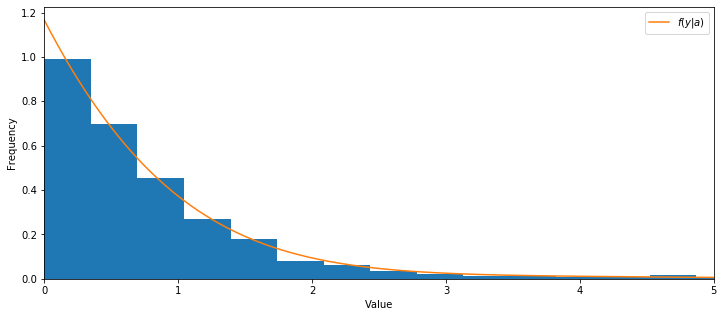

In [143]:
plt.figure(figsize = (12,5))
plt.hist(vals, bins = 20, normed = True)
plt.plot(y,theo, label = "$f(y|a)$")
plt.ylabel("Frequency")
plt.xlabel("Value")
plt.xlim(0,5)
plt.legend()
plt.show()

In [144]:
#Function for the negative log likelihood
def negLogLikelihood(a_val):
    sum = 0.
    for x in vals:
        sum -= np.log(f(a_val,w,x))
    return sum

In [145]:
#Finding values for -ln at various a values
a_val = np.linspace(0,0.45,1000)
a_log = []
for i in a_val:
    a_log.append(negLogLikelihood(i))

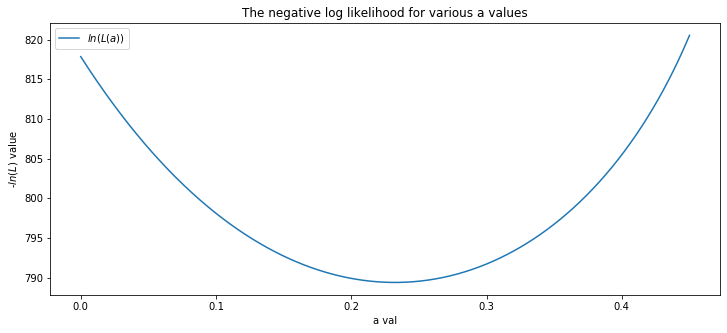

In [146]:
plt.figure(figsize = (12,5))
plt.plot(a_val,a_log, label = "$ln(L(a))$")
plt.ylabel("-$ln(L)$ value")
plt.xlabel("a val")
plt.title("The negative log likelihood for various a values")
plt.legend()
plt.show()

In [147]:
from scipy import optimize

In [148]:
result = optimize.minimize_scalar(negLogLikelihood,bounds =(0.,0.45), method = 'bounded')
a_hat = result.x

In [149]:
print("The estimate of a hat is", a_hat)

The estimate of a hat is 0.23224171591775425


In [150]:
est_a = []
#New experiment over 100 intervals
for i in range(100):
    vals = get_data(a,w,nvet)
    result = optimize.minimize_scalar(negLogLikelihood,bounds =(0.,0.45), method = 'bounded')
    a_hat = result.x
    est_a.append(a_hat)

In [151]:
mu = np.mean(est_a)
sig = np.std(est_a)
print("The mean of the estimates was found to be", mu)
print("The standard deviation of the estimates was found to be", sig)

The mean of the estimates was found to be 0.19899017016639797
The standard deviation of the estimates was found to be 0.03281334981861225


In [152]:
def get_data2(a,w,nevt):
    count = 0
    data = []
    while count < nevt:
        y = -np.log(stats.uniform.rvs())
        if 1+2*a*np.cos(y) > (1+2*a)*stats.uniform.rvs():
            data.append((1+2*w)*y)
            count += 1
    return data

In [153]:
#Exp 2 const.
a2 = 0.25
w2 = 0.

In [154]:
est_a2 = []
#Same method applied as above
for i in range(100):
    vals = get_data2(a2,w2,nvet)
    result = optimize.minimize_scalar(negLogLikelihood,bounds =(0.,0.45), method = 'bounded')
    a_hat = result.x
    est_a2.append(a_hat)

In [155]:
mu2 = np.mean(est_a2)
sig2 = np.std(est_a2)
print("The mean of the estimates was found to be", mu2)
print("The standard deviation of the estimates was found to be", sig2)

The mean of the estimates was found to be 0.25030948106554834
The standard deviation of the estimates was found to be 0.03169824210915592


In [156]:
w = np.random.normal(0,0.05)
w2 = 2*w

In [157]:
est_a = []
for i in range(100):
    vals = get_data(a,w,nvet)
    result = optimize.minimize_scalar(negLogLikelihood,bounds =(0.,0.45), method = 'bounded')
    a_hat = result.x
    est_a.append(a_hat)

In [158]:
est_a2 = []
for i in range(100):
    vals = get_data2(a2,w2,nvet)
    result = optimize.minimize_scalar(negLogLikelihood,bounds =(0.,0.45), method = 'bounded')
    a_hat = result.x
    est_a2.append(a_hat)

In [159]:
print("The a estimate from experiment 1 is", np.mean(est_a))
print("The a estimate from experiment 2 is", np.mean(est_a2))

The a estimate from experiment 1 is 0.25822820934332996
The a estimate from experiment 2 is 0.42256939363288837


In [160]:
#Finding variances
var_1 = np.var(est_a)
var_2 = np.var(est_a2)

In [161]:
#Covariance calculation
covar = np.cov(est_a,est_a2)
covar

array([[ 0.00123887, -0.00010681],
       [-0.00010681,  0.00041661]])

By the nature of the covariance matrix, the top-right and bottom-left values are the covariance between the two estimates

In [162]:
#Correlation coeff. calc.
r = covar[0][1] / (np.sqrt(abs(var_1)) * np.sqrt(abs(var_2)))

In [163]:
print("The variance of experiment 1's estimates are", var_1)
print("The variance of experiment 2's estimates are", var_2)
print("The covariance between the two sets of estimates is", covar[0][1])
print("The correlation coefficient was found to be", r)

The variance of experiment 1's estimates are 0.0012264850088853142
The variance of experiment 2's estimates are 0.00041244462996038484
The covariance between the two sets of estimates is -0.00010681145929117918
The correlation coefficient was found to be -0.15017716435183612


In [167]:
n = 100
S1 = 0.047
S2 = 0.084
se = np.sqrt((1-r**2)*(n-1)/(n-2))
print("The standard error of the estimate 1 is", se * S1)
print("The standard error of the estimate 2 is", se * S2)

The standard error of the estimate 1 is 0.04670345247487227
The standard error of the estimate 2 is 0.08347000016785683


In [168]:
#Since r would be 0 if cov. is 0. SE becomes
s_zero = np.sqrt((n-1)/(n-2))

In [169]:
print("The standard error if the covariance was assumed to be zero would be", s_zero * S1, "for experiment 1")
print("The standard error if the covariance was assumed to be zero would be", s_zero * S2, "for experiment 2")

The standard error if the covariance was assumed to be zero would be 0.04723918729536454 for experiment 1
The standard error if the covariance was assumed to be zero would be 0.08442748367682174 for experiment 2
